In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startups=pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR\\Assignment\\Assn 5 Multi Linear Regression\\50_Startups.csv")

In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

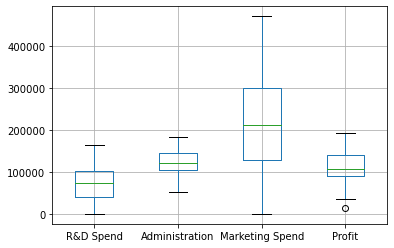

In [6]:
startups.boxplot()

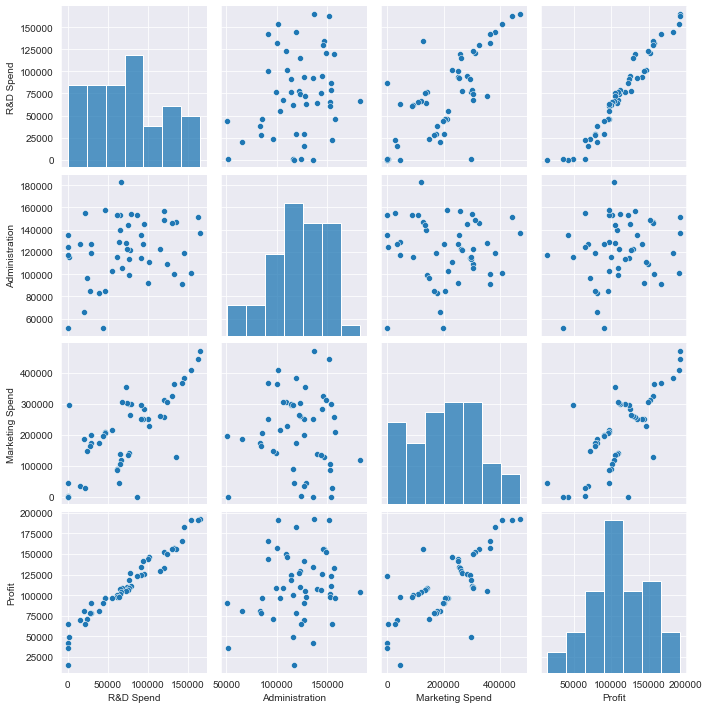

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [8]:
startups=startups.rename(columns={"R&D Spend":"RD","Marketing Spend":"MS"})

In [9]:
startups

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
startups=startups.drop(["State"],axis=1)

In [11]:
startups.head

<bound method NDFrame.head of            RD  Administration         MS     Profit
0   165349.20       136897.80  471784.10  192261.83
1   162597.70       151377.59  443898.53  191792.06
2   153441.51       101145.55  407934.54  191050.39
3   144372.41       118671.85  383199.62  182901.99
4   142107.34        91391.77  366168.42  166187.94
5   131876.90        99814.71  362861.36  156991.12
6   134615.46       147198.87  127716.82  156122.51
7   130298.13       145530.06  323876.68  155752.60
8   120542.52       148718.95  311613.29  152211.77
9   123334.88       108679.17  304981.62  149759.96
10  101913.08       110594.11  229160.95  146121.95
11  100671.96        91790.61  249744.55  144259.40
12   93863.75       127320.38  249839.44  141585.52
13   91992.39       135495.07  252664.93  134307.35
14  119943.24       156547.42  256512.92  132602.65
15  114523.61       122616.84  261776.23  129917.04
16   78013.11       121597.55  264346.06  126992.93
17   94657.16       145077.58  282

In [12]:
model = smf.ols('Profit~RD+Administration+MS',data=startups).fit()


In [13]:
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [16]:
print("R Squared value:",model.rsquared,"Adjusted R Squared Value:",model.rsquared_adj)

R Squared value: 0.9507459940683246 Adjusted R Squared Value: 0.9475337762901719


In [17]:
modelRD=smf.ols('Profit~RD',data = startups).fit()  
#t and p-Values
print(modelRD.tvalues, '\n', modelRD.pvalues) 
modelRD.summary()

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           3.50e-32
Time:                        22:47:20   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
print("R Squared value for RD:",modelRD.rsquared,"Adjusted R Squared Value for RD:",modelRD.rsquared_adj)

R Squared value for RD: 0.9465353160804392 Adjusted R Squared Value for RD: 0.9454214684987816


In [19]:
modelAD=smf.ols('Profit~Administration',data = startups).fit()  
#t and p-Values
print(modelAD.tvalues, '\n', modelAD.pvalues)
modelAD.summary()

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.162
Time:                        22:47:20   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print("R Squared value for AD:",modelRD.rsquared,"Adjusted R Squared Value for AD:",modelRD.rsquared_adj)

R Squared value for AD: 0.9465353160804392 Adjusted R Squared Value for AD: 0.9454214684987816


In [21]:
modelMS=smf.ols('Profit~MS',data = startups).fit()  
#t and p-Values
print(modelAD.tvalues, '\n', modelAD.pvalues)
modelMS.summary()

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           4.38e-10
Time:                        22:47:20   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print("R Squared value for MS:",modelRD.rsquared,"Adjusted R Squared Value for MS:",modelRD.rsquared_adj)

R Squared value for MS: 0.9465353160804392 Adjusted R Squared Value for MS: 0.9454214684987816


In [23]:
modelADRD=smf.ols('Profit~Administration+RD',data = startups).fit()
print(modelADRD.tvalues, '\n', modelAD.pvalues)
modelADRD.summary()

Intercept          9.122352
Administration    -1.072677
RD                28.588870
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           7.29e-31
Time:                        22:47:21   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
RD                 0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
(modelADRD.rsquared,modelADRD.rsquared_adj)

(0.9478129385009173, 0.9455922124796797)

VIF Values

In [25]:
rsq_Profit=smf.ols('Profit~RD+Administration+MS',data=startups).fit().rsquared
vif_Profit=1/(1-rsq_Profit)
vif_Profit

20.30291711474573

In [26]:
rsq_RD=smf.ols('RD~Profit+Administration+MS',data=startups).fit().rsquared
vif_RD =1/(1-rsq_RD)
vif_RD

19.563000566996017

In [27]:
rsq_AD=smf.ols('Administration~Profit+RD+MS',data=startups).fit().rsquared
vif_AD=1/(1-rsq_AD)
vif_AD

1.1821455725780203

In [28]:
rsq_MS=smf.ols('MS~Profit+RD+Administration',data=startups).fit().rsquared
vif_MS=1/(1-rsq_MS)
vif_MS

2.4653316722258247

In [29]:
df=pd.DataFrame(data={'Names':['Profit','RD','Administration','MS'],'VIF':[vif_Profit,vif_RD,vif_AD,vif_MS]})
df

,Names,VIF
0,Profit,20.302917
1,RD,19.563001
2,Administration,1.182146
3,MS,2.465332


In [30]:
res =model.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [31]:
res.mean()

7.625203579664231e-11

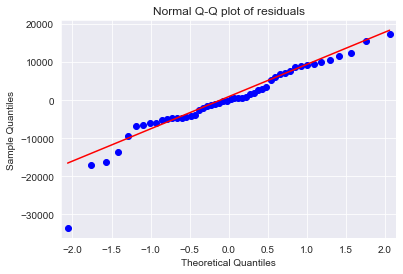

In [32]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [33]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

Residual Plot for Homoscedasticity

In [34]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

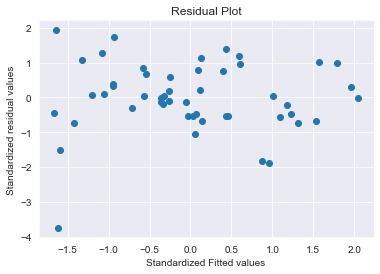

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

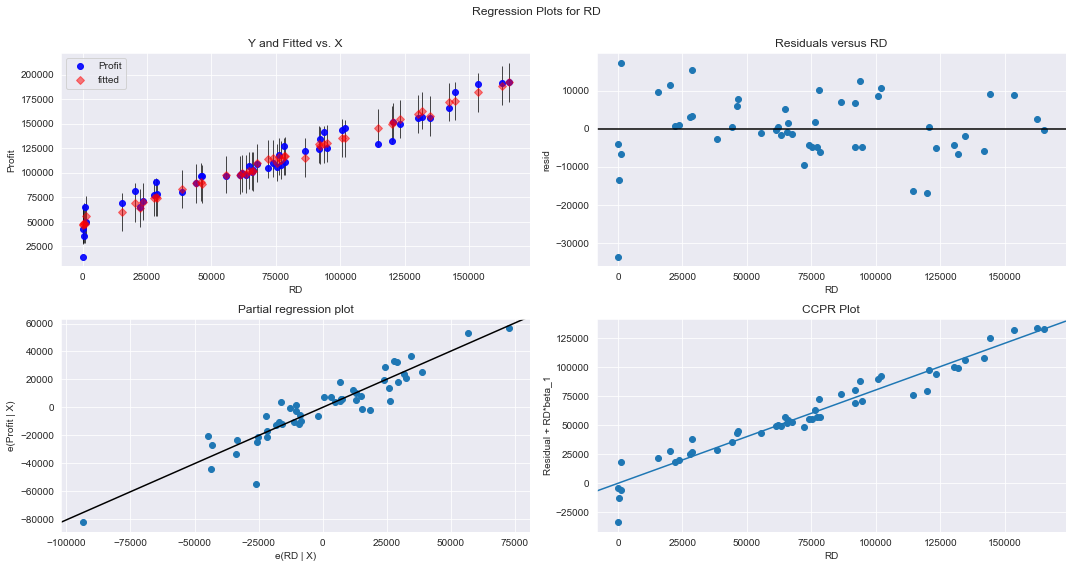

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

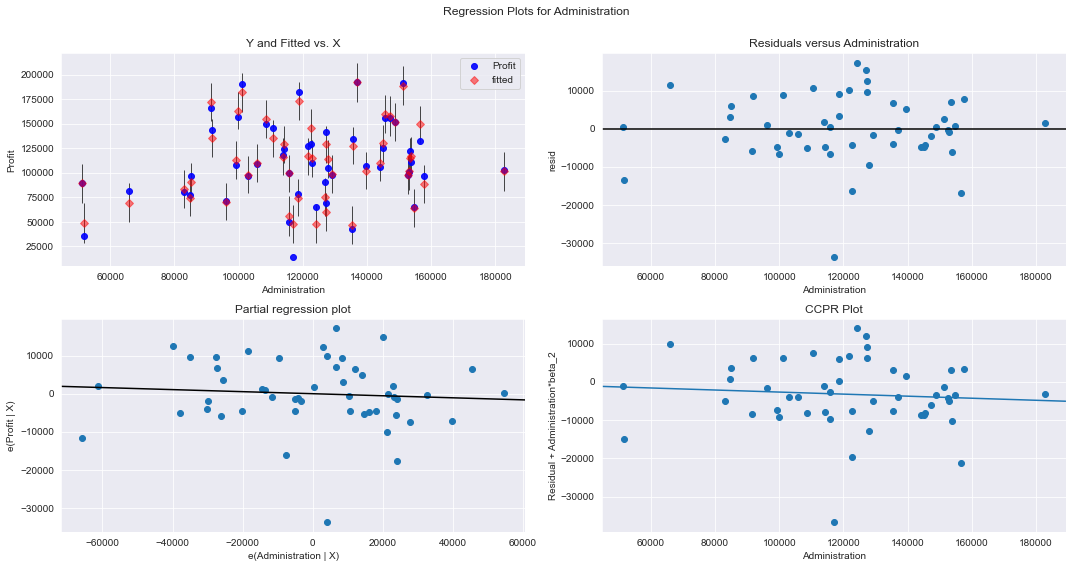

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

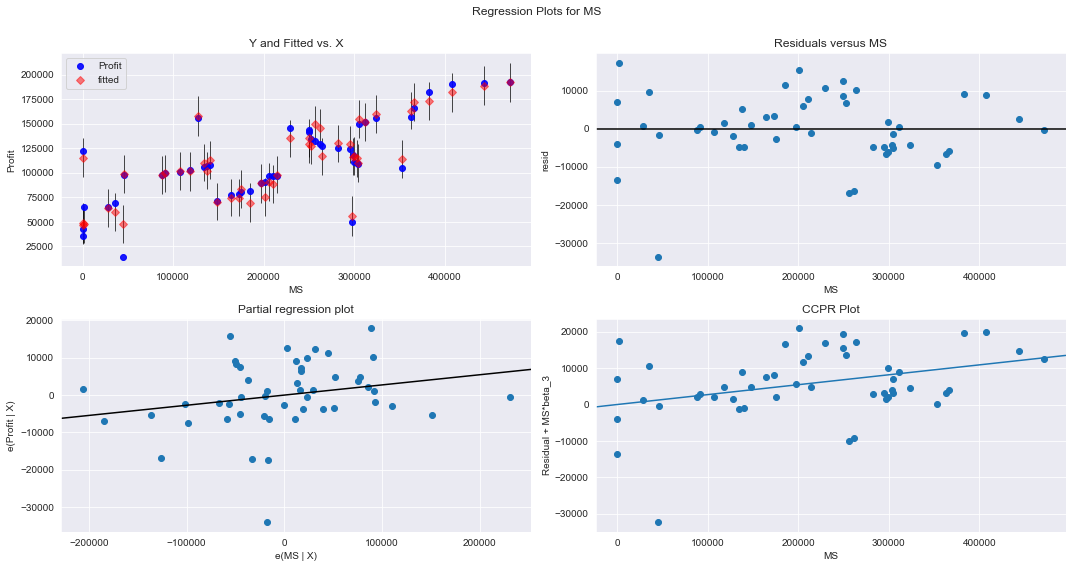

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics
Detecting Influencers /Outliers
Cooks Distance

In [39]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

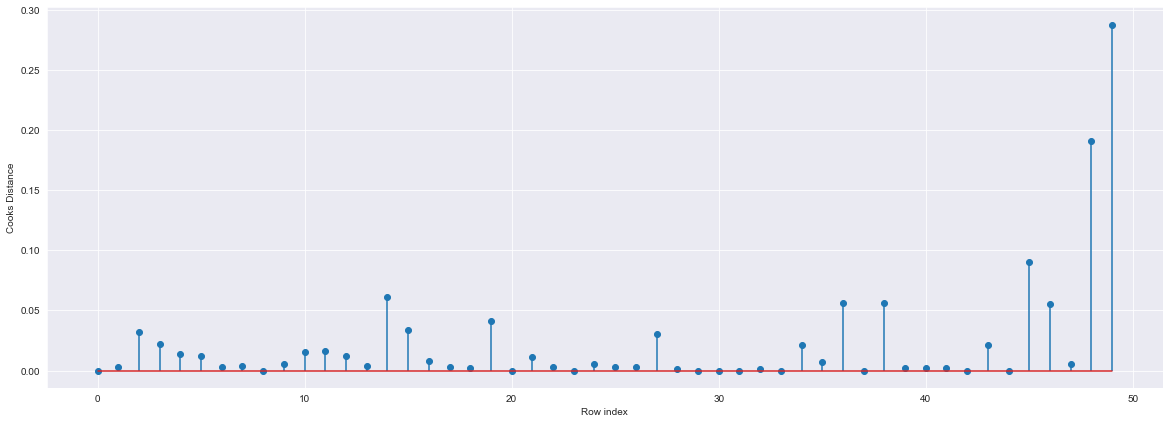

In [40]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# IMPROVING THE MODEL

In [42]:
#Load the data
startup1 = pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR\\Assignment\\Assn 5 Multi Linear Regression\\50_Startups.csv")

In [43]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup2=startup1.drop(startup1.index[[48,49]],axis=0).reset_index()

In [44]:
#Drop the original index
startup2=startup2.drop(['State'],axis=1)

In [45]:
startup2

,index,R&D Spend,Administration,Marketing Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [46]:
#Drop the original index
startup2=startup2.drop(['index'],axis=1)

In [47]:
#rename the col
startups2=startup2.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}, inplace =False)

# Build Model

In [48]:
#Exclude variable "ad" and generate R-Squared and AIC values
final_ml_ad= smf.ols('Profit~rd+ms',data = startups2).fit()

In [49]:
(final_ml_ad.rsquared,final_ml_ad.aic)

(0.9609119875752479, 994.886442942941)

In [50]:
#Exclude variable "ms" and generate R-Squared and AIC values
final_ml_ms= smf.ols('Profit~rd+ad',data = startups2).fit()

In [51]:
(final_ml_ms.rsquared,final_ml_ms.aic)

(0.9613542664192156, 994.3402293693792)

# Predicting for new data

In [52]:
#New data for prediction
new_data=pd.DataFrame({'rd':162597.70,'ad':118671.85,'ms':304981.52},index=[1])

In [53]:
new_data

,rd,ad,ms
1,162597.7,118671.85,304981.52


In [54]:
final_ml_ad.predict(new_data)

1    183740.8243
dtype: float64

In [56]:
final_ml_ad.predict(startups2.iloc[0:5,])

0    189885.740778
1    187095.246496
2    179181.591670
3    171606.096081
4    169451.985498
dtype: float64

In [58]:
pred_y = final_ml_ad.predict(startups2)

In [59]:
pred_y

0     189885.740778
1     187095.246496
2     179181.591670
3     171606.096081
4     169451.985498
5     161500.313852
6     157929.476340
7     159344.167484
8     151541.585916
9     153530.033848
10    135216.183117
11    134758.234001
12    129521.945343
13    128150.253596
14    149749.963756
15    145706.920129
16    117675.954567
17    130922.882285
18    128983.420883
19    117761.257387
20    117150.983892
21    118820.135210
22    115524.963571
23    110587.752231
24    113941.581902
25    104353.248043
26    112464.314154
27    115277.118261
28    104941.871740
29    104332.812499
30    101167.803455
31    100437.197751
32    101168.375422
33     99148.202614
34     92078.263418
35     91633.714754
36     78177.525204
37     89932.884669
38     71304.837486
39     85160.144690
40     77563.103445
41     76699.268770
42     73029.882710
43     64054.516093
44     69014.452144
45     52081.185452
46     59452.173426
47     51265.583966
dtype: float64